<a href="https://colab.research.google.com/github/SudeepRShetty/Restaurant_review_analysis/blob/main/MajorProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Importing all required library***

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


Loading Data


In [ ]:
review = pd.read_table('/content/Restaurant_Reviews.tsv')
review

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


Data Cleansing


In [ ]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
review.isnull().sum() #so we found out that there are no null entry in the given dataset

Review    0
Liked     0
dtype: int64

EDA

In [ ]:
review.Liked.value_counts()

1    500
0    500
Name: Liked, dtype: int64

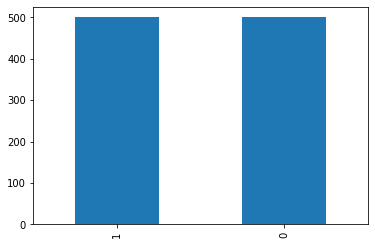

In [ ]:
review.Liked.value_counts().plot(kind = 'bar')
plt.show()

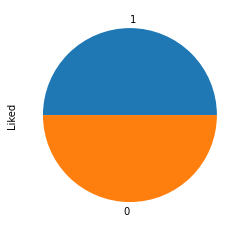

In [ ]:
review.Liked.value_counts().plot(kind = 'pie')
plt.show()

**Working**

In [ ]:
x = review.Review.values
y = review.Liked.values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state =0,test_size = 0.3)

Applying Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(stop_words = 'english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

Modelling using MultinomialNB algo and checking accuracy score

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
model1 = MultinomialNB()
model1.fit(x_train_vect,y_train)
ypred1 = model1.predict(x_test_vect)
accuracy_score(ypred1,y_test)

0.77

Modelling using Support Vector classifier algo and checking accuracy score

In [ ]:
from sklearn.svm import SVC
model2 = SVC()
model2.fit(x_train_vect,y_train)
ypred2 = model2.predict(x_test_vect)
accuracy_score(ypred2,y_test)

0.72

Modelling using pipline of MultinomailNB and Count Vectorizer algo and checking accuracy score

In [ ]:
from sklearn.pipeline import make_pipeline
model3 = make_pipeline(CountVectorizer(),MultinomialNB())
model3.fit(x_train,y_train)
ypred3 = model3.predict(x_test)
accuracy_score(ypred3,y_test)

0.7733333333333333

Modelling using pipline of Support Vector Classifier and Count Vectorizer algo and checking accuracy score

In [ ]:
model4 = make_pipeline(CountVectorizer(),SVC())
model4.fit(x_train,y_train)
ypred4 = model4.predict(x_test)
accuracy_score(ypred4,y_test)

0.726

Acuuracy Results[1] :
MultinomialNB : 77%,
SVC = 72% ,
Pipeline Of MultinomailNB with CountVector : 77.33%,
Pipeline Of SVC with CountVector: 72.60%



Apply tfidfvectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words = 'english')
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

Modelling using MultinomialNB algo and checking accuracy score

In [ ]:
model5 = MultinomialNB()
model5.fit(x_train_tfidf,y_train)
ypred5 = model5.predict(x_test_tfidf)
accuracy_score(ypred5,y_test)

0.7566666666666667

Modelling using Support Vector classifier algo and checking accuracy score

In [ ]:
model6 = SVC()
model6.fit(x_train_tfidf,y_train)
ypred6 = model6.predict(x_test_tfidf)
accuracy_score(ypred6,y_test)

0.7566666666666667

Modelling using pipline of MultinomailNB and Tfidf Vectorizer algo and checking accuracy score

In [ ]:
model7 = make_pipeline(TfidfVectorizer(),MultinomialNB())
model7.fit(x_train,y_train)
ypred7 = model7.predict(x_test)
accuracy_score(ypred7,y_test)

0.7833333333333333

Modelling using pipline of Support Vector Classifier and Tfidf Vectorizer algo and checking accuracy score

In [ ]:
model8 = make_pipeline(TfidfVectorizer(),SVC())
model8.fit(x_train,y_train)
ypred8 = model8.predict(x_test)
accuracy_score(ypred8,y_test)

0.8066666666666666

Acuuracy Results[2] :
MultinomialNB : 75.66%,
SVC = 75.66% ,
Pipeline Of MultinomailNB with CountVector : 78.33%,
Pipeline Of SVC with CountVector: 80.66%



***Since Model 8 Acuuracy is High , here prediction are made using model 8***

In [ ]:
# WEBAPP using the model
import joblib
joblib.dump(model8,'Sentiment-Analysis')


['Sentiment-Analysis']

In [ ]:
reload_model = joblib.load('Sentiment-Analysis')
reload_model.predict(['worst'])

array([0])

In [ ]:
reload_model.predict(['good'])

array([1])

In [ ]:
!pip install streamlit --quiet

     |████████████████████████████████| 10.1 MB 7.6 MB/s 
     |████████████████████████████████| 181 kB 36.9 MB/s 
     |████████████████████████████████| 111 kB 41.6 MB/s 
     |████████████████████████████████| 76 kB 4.7 MB/s 
     |████████████████████████████████| 164 kB 58.5 MB/s 
     |████████████████████████████████| 4.3 MB 55.8 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 130 kB 55.4 MB/s 
     |████████████████████████████████| 793 kB 50.8 MB/s 
     |████████████████████████████████| 130 kB 52.3 MB/s 
     |████████████████████████████████| 428 kB 56.1 MB/s 
     |████████████████████████████████| 381 kB 44.5 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-console 5.2.0 requires prompt-toolkit<2.0.0,>=1.0.0, but you have prompt-toolkit 3.0.29 which is incompatible.
google-colab 1

In [ ]:
%%writefile app.py
import streamlit as st
import joblib
st.title("SENTIMENT ANALYSIS")
reload_model = joblib.load('Sentiment-Analysis')
ip = st.text_input("Enter the REVIEW: ") #Getting user input
op = reload_model.predict([ip])[0]
dict = {0 :'Negative', 1 : 'Positive'}
if st.button('PREDICT'):
  st.title(dict[op])

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-04-08 11:36:26.900 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 6.267s
your url is: https://young-otter-19.loca.lt

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://35.197.48.67:8501

  Stopping...
^C
